## 什么是集成学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
X,y = datasets.make_moons(n_samples = 500,noise =0.3,random_state = 66)

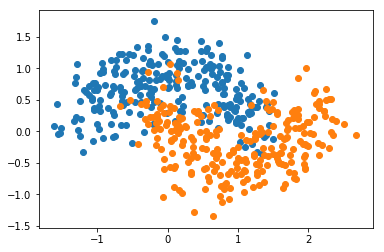

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=66)

In [5]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)
log_clf.score(X_test,y_test)

0.832

In [6]:
# 支持向量机SVM
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_clf.score(X_test,y_test)

0.904

In [7]:
# 决策树
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=666)
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,y_test)

0.888

In [8]:
y_predict1 = log_clf.predict(X_test)
y_predict2 = svm_clf.predict(X_test)
y_predict3 = dt_clf.predict(X_test)

In [9]:
y_predict = np.array((y_predict1+y_predict2+y_predict3) >= 2, dtype = 'int')

In [10]:
y_predict[:10]

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.904

## 硬划分只考虑票数的多少，软划分考虑票数的权重

#### 使用Hard Voting Classifier

In [12]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('log_clf',LogisticRegression()),
    ('svm_clf',SVC()),
    ('dt_clf',DecisionTreeClassifier(random_state = 666))
],voting = 'hard') # voting = 'hard'硬划分

In [13]:
voting_clf.fit(X_train,y_train)
voting_clf.score(X_test,y_test)

/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.904

#### 使用Soft Voting Classifier

In [14]:
voting_clf2 = VotingClassifier(estimators=[
    ('log_clf',LogisticRegression()),
    ('svm_clf',SVC(probability=True)),
    ('dt_clf',DecisionTreeClassifier(random_state = 666))
],voting = 'soft') 

In [15]:
voting_clf2.fit(X_train, y_train)
voting_clf2.score(X_test, y_test)

/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.904